# Tugas Besar AutoML (Advanced Machine Learning)


IF-42-GAB
*   Farhan Anas 1301183427
*   Antika Putri Permata Wardani 1301183420

### TPOT INSTALLATION

In [ ]:
!pip install tpot

### IMPORT LIBRARY

In [ ]:
# Library Utama
import pandas as pd
import numpy as np

# Library Data PreProcessing
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Library Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Library Modelling
from tpot import TPOTClassifier

# Lirary Evaluation
from sklearn import metrics

## DATA EXPLORATION

### 1 Load Data

In [ ]:
# Memanggil Dataset
df = pd.read_csv('weatherAUS.csv')
# Menampilkan beberapa isi dataset
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### 2 Features Fill

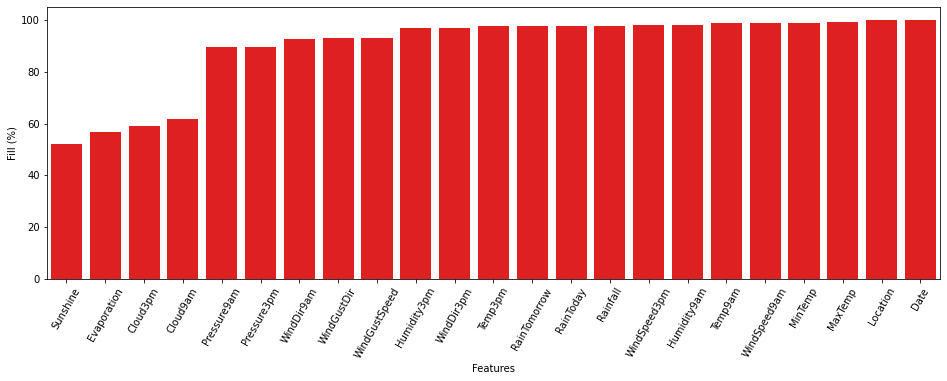

In [ ]:
# Menghitung data yang bernilai tidak null pada suatu kolom
features_fill = pd.DataFrame(100 * df.count().sort_values() / df.shape[0])
features_fill.reset_index(inplace=True)
features_fill.columns = ['Features', 'Fill (%)']

# Visualisasi jumlah data yang tidak null pada suatu kolom dalam bentuk persen
plt.figure(figsize=(16, 5))
sns.barplot(x = 'Features', y = 'Fill (%)', data = features_fill, color = 'red')
plt.xticks(rotation=60)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

### 3 Feature Types

In [ ]:
# List berisi tipe numerical
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
# List berisi tipe categorical
categorical_features = df.select_dtypes(include='object').columns.tolist()

# Mengeluarkan list kolom yang memiliki nilai numerik
print('Numerical Columns:', numerical_features)
# Mengeluarkan list kolom yang memiliki nilai kategorik
print('\nCategorigal Columns:', categorical_features)

Numerical Columns: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

Categorigal Columns: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


### 4 Feature Correlations

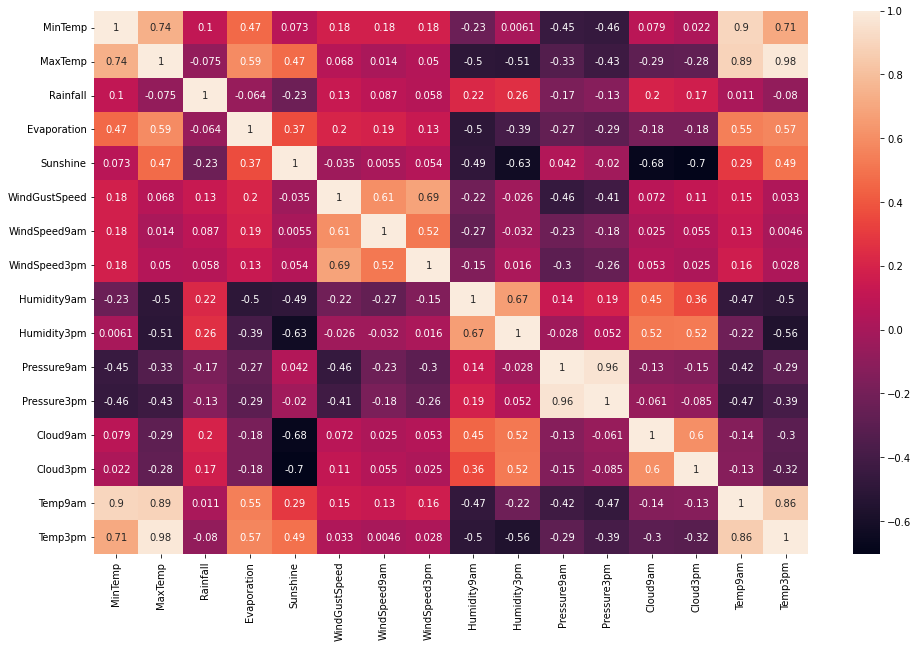

In [ ]:
# Visualisasi korelasi antara satu kolom dengan kolom lainnya
f, ax = plt.subplots(figsize=(16, 10))
corr = df.corr()
sns.heatmap(corr, ax=ax, annot=True)

## DATA PREPROCESSING

### 1 Dropping Features

#### 1.1 Drop Duplicate Data

In [ ]:
# Menyalin dataframe
df_drop = df.copy()

# Drop data yang duplikat
df_drop = df_drop.drop_duplicates()

# Reset index
df_drop.reset_index(drop=True, inplace=True)
df_drop

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


#### 1.2 Drop Null Data

In [ ]:
# Drop data yang memiliki nilai null
df_drop = df_drop.dropna()

# Reset index
df_drop.reset_index(drop=True, inplace=True)
df_drop

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
1,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
2,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
3,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
4,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,NE,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No
56416,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,SE,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No
56417,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,W,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No
56418,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,NNW,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No


#### 1.3 Drop Outliers

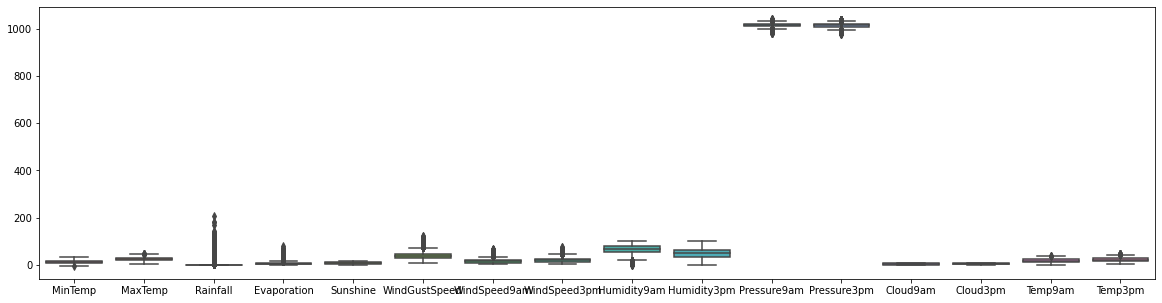

In [ ]:
# Visualisasi data sebelum drop outlier
plt.figure(figsize=(20,5))
sns.boxplot(data=df_drop)

In [ ]:
# Menampilkan jumlah data beserta outliernya
print("jumlah data dengan outliers:", df_drop.shape)

# Drop outliers
df_drop = df_drop[(np.abs(stats.zscore(df_drop.select_dtypes(include=np.number))) < 3).all(axis=1)]

# Menampilkan jumlah data setelah menghilangkan outliernya
print("jumlah data tanpa outliers:", df_drop.shape)

# Reset index
df_drop.reset_index(drop=True, inplace=True)
df_drop

jumlah data dengan outliers: (56420, 23)
jumlah data tanpa outliers: (53196, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
1,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
2,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
3,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
4,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53191,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,NE,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No
53192,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,SE,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No
53193,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,W,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No
53194,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,NNW,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No


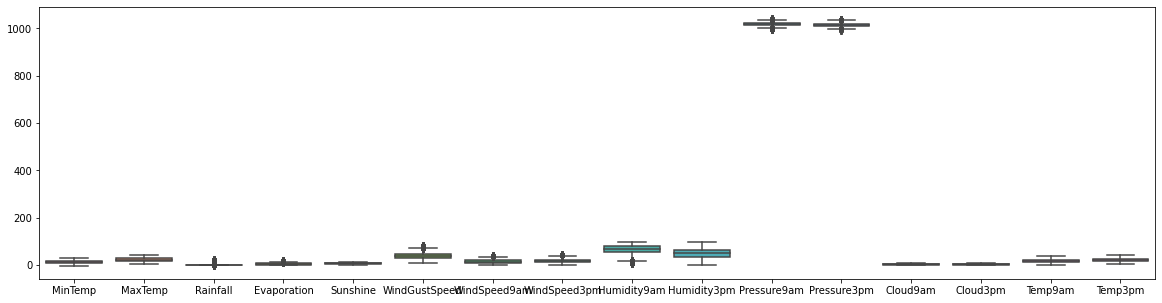

In [ ]:
# Visualisasi data setelah outlier hilang
plt.figure(figsize=(20,5))
sns.boxplot(data=df_drop)

### 2 Features Encoding

In [ ]:
# Mendifinisikan kelas tipe Encoding
labelEncode  = LabelEncoder()
# Menyalin dataframe setelah drop
df_encode = df_drop.copy()
# Membuat list berisi columns dataframe yang numerical
categorical_features = df_encode.select_dtypes(include='object').columns.tolist()

# Proses Encoding categorical
for category in categorical_features:
  df_encode[category] = labelEncode.fit_transform(df_encode[category])

# Menampilkan dataframe hasil encoding
df_encode

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,401,4,17.9,35.2,0.0,12.0,12.3,11,48.0,1,12,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
1,402,4,18.4,28.9,0.0,14.8,13.0,8,37.0,10,10,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
2,404,4,19.4,37.6,0.0,10.8,10.6,5,46.0,5,6,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
3,405,4,21.9,38.4,0.0,11.4,12.2,14,31.0,14,15,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
4,406,4,24.2,41.0,0.0,11.2,8.4,14,35.0,7,14,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53191,3404,6,19.3,33.4,0.0,6.0,11.0,1,35.0,9,4,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0,0
53192,3405,6,21.2,32.6,0.0,7.6,8.6,0,37.0,9,9,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0,0
53193,3406,6,20.7,32.8,0.0,5.6,11.0,0,33.0,0,13,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0,0
53194,3407,6,19.5,31.8,0.0,6.2,10.6,2,26.0,9,6,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0,0


In [ ]:
# Download dataset setelah preprocess dan sebelum split
df_encode.to_csv('weatherAUS_telah_diolah.csv')

### 3 Normalize and Download Data

In [ ]:
# Mengubah nilai tiap kolom menjadi range 0 sampai 1
df_normalize = df_encode.copy()
df_ready = (df_normalize - df_normalize.min()) / (df_normalize.max() - df_normalize.min())

#Menampilkan dataframe hasil normalisasi
df_ready

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.117630,0.16,0.662857,0.760391,0.0,0.731707,0.848276,0.733333,0.549296,0.066667,0.800000,0.108108,0.428571,0.101124,0.13,0.235437,0.247573,0.250,0.555556,0.710937,0.751899,0.0,0.0
1,0.117923,0.16,0.677143,0.606357,0.0,0.902439,0.896552,0.533333,0.394366,0.666667,0.666667,0.459459,0.404762,0.213483,0.08,0.395631,0.434466,0.125,0.111111,0.546875,0.589873,0.0,0.0
2,0.118510,0.16,0.705714,0.819071,0.0,0.658537,0.731034,0.333333,0.521127,0.333333,0.400000,0.756757,0.309524,0.348315,0.22,0.381068,0.364078,0.125,0.666667,0.765625,0.789873,0.0,0.0
3,0.118803,0.16,0.777143,0.838631,0.0,0.695122,0.841379,0.933333,0.309859,0.933333,1.000000,0.108108,0.095238,0.292135,0.22,0.390777,0.361650,0.125,0.555556,0.776042,0.807595,0.0,0.0
4,0.119097,0.16,0.842857,0.902200,0.0,0.682927,0.579310,0.933333,0.366197,0.466667,0.933333,0.405405,0.261905,0.089888,0.15,0.342233,0.320388,0.125,0.666667,0.893229,0.858228,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53191,0.998533,0.24,0.702857,0.716381,0.0,0.365854,0.758621,0.066667,0.366197,0.600000,0.266667,0.189189,0.428571,0.584270,0.32,0.419903,0.395631,0.000,0.111111,0.656250,0.724051,0.0,0.0
53192,0.998827,0.24,0.757143,0.696822,0.0,0.463415,0.593103,0.000000,0.394366,0.600000,0.600000,0.297297,0.214286,0.505618,0.28,0.436893,0.412621,0.875,0.000000,0.664062,0.716456,0.0,0.0
53193,0.999120,0.24,0.742857,0.701711,0.0,0.341463,0.758621,0.000000,0.338028,0.000000,0.866667,0.405405,0.214286,0.393258,0.23,0.453883,0.427184,0.000,0.000000,0.664062,0.718987,0.0,0.0
53194,0.999413,0.24,0.708571,0.677262,0.0,0.378049,0.731034,0.133333,0.239437,0.600000,0.400000,0.189189,0.357143,0.573034,0.58,0.444175,0.400485,0.125,0.111111,0.664062,0.645570,0.0,0.0


In [ ]:
# Download dataset setelah preprocess dan sebelum split
df_ready.to_csv('weatherAUS_telah_diolah_norm.csv')

### 4 Split Data

Tidak Normalisasi

In [ ]:
# Split data non-label dan label
x = df_encode.copy().drop(['RainTomorrow'], axis=1)
y = df_encode.copy()['RainTomorrow']

# Split data train dan test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Menampilkan data train
print('Data X_train:')
display(x_train)

# Menampilkan data test
print('\nData X_test:')
display(x_test)

Data X_train:


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
33478,1325,21,9.9,24.1,0.0,7.4,10.4,1,37.0,9,1,11.0,30.0,61.0,54.0,1020.3,1017.0,2.0,1.0,20.2,22.6,0
46847,491,7,12.6,24.2,0.2,2.0,7.2,5,39.0,3,5,15.0,20.0,71.0,48.0,1028.3,1025.1,1.0,5.0,16.9,22.8,0
42484,2178,16,17.0,31.5,0.0,9.4,12.6,12,48.0,11,12,20.0,33.0,39.0,42.0,1007.8,1005.4,1.0,1.0,23.9,28.9,0
5784,2770,13,14.4,19.4,4.8,5.8,10.1,13,61.0,12,11,30.0,33.0,69.0,62.0,1009.1,1009.6,4.0,3.0,16.4,18.4,1
39999,1271,25,6.2,21.0,0.0,2.2,8.4,14,63.0,6,14,17.0,39.0,59.0,38.0,1016.5,1011.6,1.0,1.0,10.1,20.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1605,22,1.6,18.7,0.0,1.8,9.2,14,20.0,0,13,11.0,7.0,84.0,35.0,1025.4,1022.3,5.0,5.0,6.7,18.4,0
44732,1401,15,12.9,23.5,0.2,4.8,12.4,2,31.0,2,10,13.0,13.0,56.0,38.0,1019.9,1017.2,4.0,4.0,18.2,22.0,0
38158,1401,14,15.8,27.4,0.0,5.8,2.0,15,46.0,14,15,19.0,24.0,53.0,69.0,1010.2,1009.0,6.0,8.0,22.9,21.4,0
860,816,5,19.4,25.4,2.0,3.8,2.8,15,24.0,7,10,11.0,19.0,93.0,78.0,1021.3,1019.6,8.0,6.0,20.9,24.2,1



Data X_test:


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
16313,464,9,11.3,16.1,0.6,4.6,0.2,12,52.0,12,8,28.0,30.0,77.0,70.0,1015.8,1016.2,7.0,8.0,13.0,14.7,0
15444,1275,18,5.0,15.9,0.0,1.0,3.2,13,41.0,5,13,7.0,24.0,77.0,61.0,1024.3,1024.6,6.0,7.0,11.6,15.3,0
26976,2790,23,13.1,33.9,0.0,8.6,9.2,3,52.0,0,4,11.0,24.0,53.0,19.0,1018.0,1014.5,5.0,3.0,22.8,32.4,0
14574,1429,3,10.2,16.2,6.6,4.4,0.4,2,31.0,10,2,9.0,13.0,89.0,91.0,1022.9,1019.5,8.0,8.0,12.8,15.4,1
15785,1692,18,1.6,15.3,0.2,1.7,0.5,13,46.0,0,5,7.0,4.0,97.0,56.0,1017.9,1014.0,8.0,8.0,6.0,15.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35107,492,12,14.6,32.8,0.0,6.4,8.7,3,39.0,15,6,2.0,20.0,58.0,24.0,1018.5,1015.3,7.0,3.0,19.1,32.2,0
17417,1749,9,4.6,15.1,4.2,3.8,6.4,15,31.0,13,7,15.0,11.0,73.0,43.0,1012.8,1009.3,6.0,7.0,9.6,14.0,1
37309,2908,12,9.4,26.4,0.0,6.8,12.6,11,37.0,9,11,15.0,28.0,74.0,43.0,1017.2,1015.3,7.0,1.0,17.1,24.0,0
52843,3011,6,25.9,35.1,0.0,4.8,11.1,8,37.0,11,6,15.0,9.0,75.0,41.0,1013.3,1008.8,0.0,2.0,29.1,34.0,0


Normalisasi

In [ ]:
# Split data non-label dan label
xn = df_ready.copy().drop(['RainTomorrow'], axis=1)
yn = df_ready.copy()['RainTomorrow']

# Split data train dan test
xn_train, xn_test, yn_train, yn_test = train_test_split(xn, yn, test_size=0.25, random_state=42)

# Menampilkan data train
print('Data X_train:')
display(xn_train)

# Menampilkan data test
print('\nData X_test:')
display(xn_test)

Data X_train:


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
33478,0.388677,0.84,0.434286,0.488998,0.000000,0.451220,0.717241,0.066667,0.394366,0.600000,0.066667,0.243243,0.666667,0.561798,0.54,0.575243,0.553398,0.250,0.111111,0.544271,0.478481,0.0
46847,0.144031,0.28,0.511429,0.491443,0.008696,0.121951,0.496552,0.333333,0.422535,0.200000,0.333333,0.351351,0.428571,0.674157,0.48,0.769417,0.750000,0.125,0.555556,0.458333,0.483544,0.0
42484,0.638897,0.64,0.637143,0.669927,0.000000,0.573171,0.868966,0.800000,0.549296,0.733333,0.800000,0.486486,0.738095,0.314607,0.42,0.271845,0.271845,0.125,0.111111,0.640625,0.637975,0.0
5784,0.812555,0.52,0.562857,0.374083,0.208696,0.353659,0.696552,0.866667,0.732394,0.800000,0.733333,0.756757,0.738095,0.651685,0.62,0.303398,0.373786,0.500,0.333333,0.445312,0.372152,1.0
39999,0.372837,1.00,0.328571,0.413203,0.000000,0.134146,0.579310,0.933333,0.760563,0.400000,0.933333,0.405405,0.880952,0.539326,0.38,0.483010,0.422330,0.125,0.111111,0.281250,0.420253,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.470813,0.88,0.197143,0.356968,0.000000,0.109756,0.634483,0.933333,0.154930,0.000000,0.866667,0.243243,0.119048,0.820225,0.35,0.699029,0.682039,0.625,0.555556,0.192708,0.372152,0.0
44732,0.410971,0.60,0.520000,0.474328,0.008696,0.292683,0.855172,0.133333,0.309859,0.133333,0.666667,0.297297,0.261905,0.505618,0.38,0.565534,0.558252,0.500,0.444444,0.492187,0.463291,0.0
38158,0.410971,0.56,0.602857,0.569682,0.000000,0.353659,0.137931,1.000000,0.521127,0.933333,1.000000,0.459459,0.523810,0.471910,0.69,0.330097,0.359223,0.750,0.888889,0.614583,0.448101,0.0
860,0.239366,0.20,0.705714,0.520782,0.086957,0.231707,0.193103,1.000000,0.211268,0.466667,0.666667,0.243243,0.404762,0.921348,0.78,0.599515,0.616505,1.000,0.666667,0.562500,0.518987,1.0



Data X_test:


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
16313,0.136110,0.36,0.474286,0.293399,0.026087,0.280488,0.013793,0.800000,0.605634,0.800000,0.533333,0.702703,0.666667,0.741573,0.70,0.466019,0.533981,0.875,0.888889,0.356771,0.278481,0.0
15444,0.374010,0.72,0.294286,0.288509,0.000000,0.060976,0.220690,0.866667,0.450704,0.333333,0.866667,0.135135,0.523810,0.741573,0.61,0.672330,0.737864,0.750,0.777778,0.320312,0.293671,0.0
26976,0.818422,0.92,0.525714,0.728606,0.000000,0.524390,0.634483,0.200000,0.605634,0.000000,0.266667,0.243243,0.523810,0.471910,0.19,0.519417,0.492718,0.625,0.333333,0.611979,0.726582,0.0
14574,0.419185,0.12,0.442857,0.295844,0.286957,0.268293,0.027586,0.133333,0.309859,0.666667,0.133333,0.189189,0.261905,0.876404,0.91,0.638350,0.614078,1.000,0.888889,0.351562,0.296203,1.0
15785,0.496333,0.72,0.197143,0.273839,0.008696,0.103659,0.034483,0.866667,0.521127,0.000000,0.333333,0.135135,0.047619,0.966292,0.56,0.516990,0.480583,1.000,0.888889,0.174479,0.288608,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35107,0.144324,0.48,0.568571,0.701711,0.000000,0.390244,0.600000,0.200000,0.422535,1.000000,0.400000,0.000000,0.428571,0.528090,0.24,0.531553,0.512136,0.875,0.333333,0.515625,0.721519,0.0
17417,0.513054,0.36,0.282857,0.268949,0.182609,0.231707,0.441379,1.000000,0.309859,0.866667,0.466667,0.351351,0.214286,0.696629,0.43,0.393204,0.366505,0.750,0.777778,0.268229,0.260759,1.0
37309,0.853036,0.48,0.420000,0.545232,0.000000,0.414634,0.868966,0.733333,0.394366,0.600000,0.733333,0.351351,0.619048,0.707865,0.43,0.500000,0.512136,0.875,0.111111,0.463542,0.513924,0.0
52843,0.883250,0.24,0.891429,0.757946,0.000000,0.292683,0.765517,0.533333,0.394366,0.733333,0.400000,0.351351,0.166667,0.719101,0.41,0.405340,0.354369,0.000,0.222222,0.776042,0.767089,0.0


## MODELLING (TPOT)

### Experiment 1

Tidak Normalisasi. Dataset tidak melalui proses normalisasi sehingga langsung ke tahap split data

#### 1 Training

In [ ]:
coba_1 = TPOTClassifier(generations=5, population_size=20, cv=5, n_jobs=2, random_state=42, verbosity=2)
coba_1.fit(x_train, y_train)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8609168428025823

Generation 2 - Current best internal CV score: 0.8609168428025823

Generation 3 - Current best internal CV score: 0.8637743971408657

Generation 4 - Current best internal CV score: 0.8637743971408657

Generation 5 - Current best internal CV score: 0.8651780064272726

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.1, max_depth=9, min_child_weight=15, n_estimators=100, n_jobs=1, subsample=0.45, verbosity=0)


TPOTClassifier(generations=5, n_jobs=2, population_size=20, random_state=42,
               verbosity=2)

#### 2 Testing

In [ ]:
y_pred_coba_1 = coba_1.predict(x_test)

### EVALUATION - 1

In [ ]:
# Menampilkan classification report
print(metrics.classification_report(y_test, y_pred_coba_1))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     10612
           1       0.74      0.56      0.64      2687

    accuracy                           0.87     13299
   macro avg       0.82      0.75      0.78     13299
weighted avg       0.86      0.87      0.86     13299




## EXPERIMENT 2

Normalisasi. Sebelum dataset melalui tahap split data, dataset dinormalisasi terlebih dahulu.

#### Training

In [ ]:
coba_2 = TPOTClassifier(generations=5, population_size=20, cv=5, n_jobs=2, random_state=42, verbosity=2)
coba_2.fit(xn_train, yn_train)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8610673286801414

Generation 2 - Current best internal CV score: 0.8610673286801414

Generation 3 - Current best internal CV score: 0.8617440361148516

Generation 4 - Current best internal CV score: 0.8617440361148516

Generation 5 - Current best internal CV score: 0.8626213515993266

Best pipeline: RandomForestClassifier(MinMaxScaler(input_matrix), bootstrap=False, criterion=gini, max_features=0.45, min_samples_leaf=5, min_samples_split=8, n_estimators=100)


TPOTClassifier(generations=5, n_jobs=2, population_size=20, random_state=42,
               verbosity=2)

#### Testing

In [ ]:
y_pred_coba_2 = coba_2.predict(xn_test)

### EVALUATION - 2

In [ ]:
# Menampilkan classification report
print(metrics.classification_report(yn_test, y_pred_coba_2))

              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92     10612
         1.0       0.75      0.52      0.61      2687

    accuracy                           0.87     13299
   macro avg       0.82      0.74      0.77     13299
weighted avg       0.86      0.87      0.86     13299



## EXPERIMENT 3

Menggunakan dataset yang tidak dinormalisasi. DIlakukan perubahan generation = 15 dan population = 10

#### Training

In [ ]:
coba_3 = TPOTClassifier(generations=15, population_size=10, cv=5, n_jobs=2, random_state=42, verbosity=2)
coba_3.fit(x_train, y_train)

Optimization Progress:   0%|          | 0/160 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.859964474414511

Generation 2 - Current best internal CV score: 0.861292864320219

Generation 3 - Current best internal CV score: 0.861292864320219

Generation 4 - Current best internal CV score: 0.861292864320219

Generation 5 - Current best internal CV score: 0.8628720064354395

Generation 6 - Current best internal CV score: 0.8628720064354395

Generation 7 - Current best internal CV score: 0.8628720064354395

Generation 8 - Current best internal CV score: 0.8628720064354395

Generation 9 - Current best internal CV score: 0.8628720064354395

Generation 10 - Current best internal CV score: 0.8628720064354395

Generation 11 - Current best internal CV score: 0.8628720064354395

Generation 12 - Current best internal CV score: 0.8630223635288246

Generation 13 - Current best internal CV score: 0.8635737388338625

Generation 14 - Current best internal CV score: 0.8635737388338625

Generation 15 - Current best internal CV score: 0.8635737388

TPOTClassifier(generations=15, n_jobs=2, population_size=10, random_state=42,
               verbosity=2)

#### Testing

In [ ]:
y_pred_coba_3 = coba_3.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"


## EVALUATION - 3

In [ ]:
# Menampilkan classification report
print(metrics.classification_report(y_test, y_pred_coba_3))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     10612
           1       0.72      0.54      0.62      2687

    accuracy                           0.87     13299
   macro avg       0.81      0.75      0.77     13299
weighted avg       0.86      0.87      0.86     13299



## CONCLUSION

In [ ]:
# List untuk menampung evaluasi
evaluasi = []

# Append evaluasi ke list Model 1
evaluasi.append(['Hasil Experimen Model 1', metrics.accuracy_score(y_test, y_pred_coba_1), metrics.f1_score(y_test, y_pred_coba_1)])

# Append evaluasi ke list Model 2
evaluasi.append(['Hasil Eksperimen Model 2', metrics.accuracy_score(yn_test, y_pred_coba_2), metrics.f1_score(yn_test, y_pred_coba_2)])

# Append evaluasi ke list Model 3
evaluasi.append(['Hasil Eksperimen Model 3', metrics.accuracy_score(y_test, y_pred_coba_3), metrics.f1_score(y_test, y_pred_coba_3)])

In [ ]:
# Membuat dataframe baru dari list eval
df_akhir = pd.DataFrame(np.array(evaluasi))

# Membuat column untuk dataframe
df_akhir.columns = ['',  'Accuracy', 'F1-Score']
df_akhir.sort_values(by=['Accuracy'], ascending=False)

# Menampilkan dataframe
df_akhir

,,Accuracy,F1-Score
0,Hasil Experimen Model 1,0.870666967441161,0.6363636363636364
1,Hasil Eksperimen Model 2,0.8671328671328671,0.6117336849044165
2,Hasil Eksperimen Model 3,0.8657793819084142,0.6212603437301082
